### This notebook presents deaths over time for certain age groups with certain vaccination status

In [2]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status.csv')
#df = df.loc[(df['Vaccine product'] == 'all_types') & (df['MMWR week'] == 202213)]
df = df.loc[(df['outcome'] == 'case') & (df['Vaccine product'] == 'all_types')]
df
# & (df['Age group'] != 'all_ages_adj')
#(df['outcome'] == 'death') & 

,outcome,month,MMWR week,Age group,Vaccine product,Vaccinated with outcome,Fully vaccinated population,Unvaccinated with outcome,Unvaccinated population,Crude vax IR,Crude unvax IR,Crude IRR,Age adjusted vax IR,Age adjusted unvax IR,Age adjusted IRR,Continuity correction
0,case,APR 2021,202114,12-17,all_types,9,3.782000e+04,31430,17985455.0,23.796933,174.752321,7.343481,NaN,NaN,NaN,0
1,case,APR 2021,202114,18-29,all_types,676,2.612741e+06,77855,31792647.0,25.873211,244.883668,9.464757,NaN,NaN,NaN,0
2,case,APR 2021,202114,30-49,all_types,1858,7.601712e+06,100009,41979718.0,24.441863,238.231710,9.746872,NaN,NaN,NaN,0
3,case,APR 2021,202114,50-64,all_types,1560,7.641882e+06,51213,23586172.0,20.413820,217.131462,10.636494,NaN,NaN,NaN,0
4,case,APR 2021,202114,65-79,all_types,1685,1.481237e+07,15104,7825121.0,11.375626,193.019380,16.967803,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,case,AUG 2022,202233,30-49,all_types,57375,4.341944e+07,45989,13007687.2,132.141280,353.552475,2.675564,NaN,NaN,NaN,1
753,case,AUG 2022,202233,50-64,all_types,48078,3.594387e+07,25017,6517666.7,133.758567,383.833681,2.869601,NaN,NaN,NaN,1
754,case,AUG 2022,202233,65-79,all_types,36190,2.666231e+07,14517,2034203.3,135.734683,713.645485,5.257650,NaN,NaN,NaN,1
755,case,AUG 2022,202233,80+,all_types,13970,7.770736e+06,5666,994500.4,179.777051,569.733305,3.169110,NaN,NaN,NaN,1


In [9]:
print(f"Whole population 12+: {1.366064e+08+53047934.55}")

Whole population 12+: 189654334.55


In [10]:
#print(sum(df['Fully vaccinated population']))
print(f"Sum of unvaccinated: {115590433.0}")
print(f"Sum of fully vaccinated: {34792688.0}")
print(f"Sum for week 202114: {115590433.0+34792688.0}")

Sum of unvaccinated: 115590433.0
Sum of fully vaccinated: 34792688.0
Sum for week 202114: 150383121.0


In [11]:
df_young = df.loc[df['Age group'].isin(['12-17', '18-29', '30-49', '50-64'])]
df_old = df.loc[df['Age group'].isin(['65-79', '80+'])]

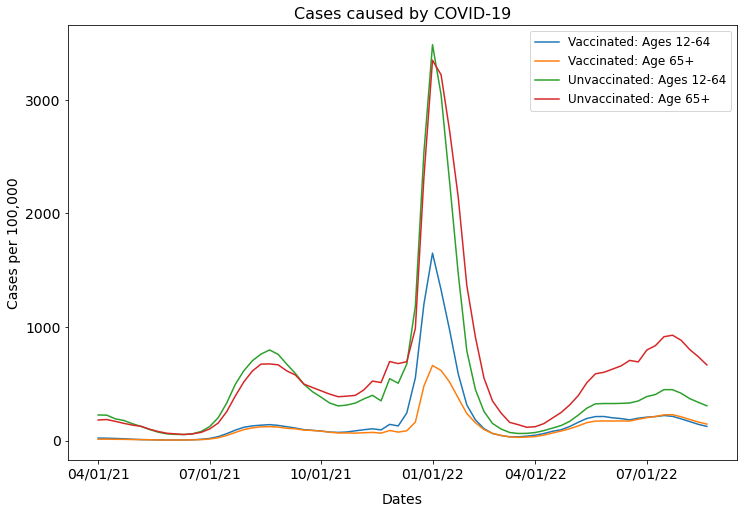

In [16]:
weeks = list(set(df_young['MMWR week']))

deaths_young = []
deaths_old = []
deaths_young2 = []
deaths_old2 = []
for week in weeks:
    deaths_vaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Unvaccinated population'])
    deaths_young.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    deaths_young2.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    deaths_vaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Unvaccinated population'])
    deaths_old.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    deaths_old2.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))  

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths_young, label = "Vaccinated: Ages 12-64")
plt.plot(weeks, deaths_old, label = "Vaccinated: Age 65+")
plt.plot(weeks, deaths_young2, label = "Unvaccinated: Ages 12-64")
plt.plot(weeks, deaths_old2, label = "Unvaccinated: Age 65+")
plt.xticks(['202114', '202127', '202140', '202201', '202213', '202226'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22', '07/01/22'], fontsize=14)
plt.yticks([0, 1000, 2000, 3000], fontsize=14)
plt.legend(fontsize=12)
plt.title("Cases caused by COVID-19", fontsize=16)
plt.ylabel("Cases per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

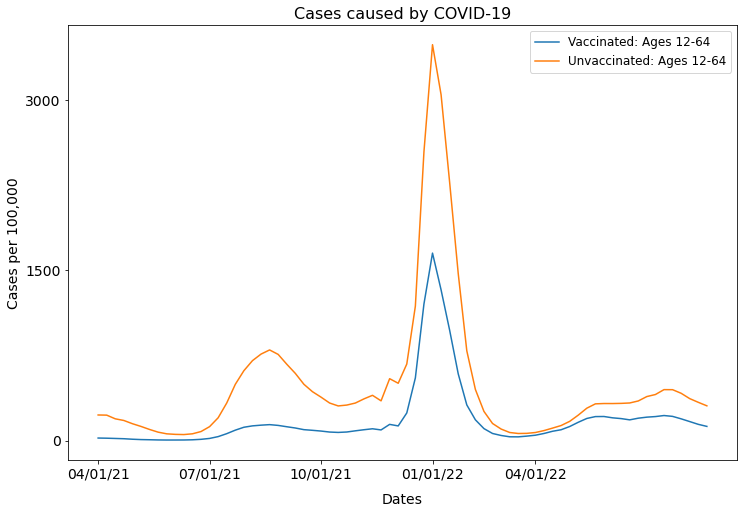

In [22]:
weeks = list(set(df_young['MMWR week']))

deaths_young = []
deaths_old = []
deaths_young2 = []
deaths_old2 = []
for week in weeks:
    deaths_vaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Unvaccinated population'])
    deaths_young.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    deaths_young2.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    deaths_vaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Unvaccinated population'])
    deaths_old.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    deaths_old2.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))  

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths_young, label = "Vaccinated: Ages 12-64")
#plt.plot(weeks, deaths_old, label = "Vaccinated: Age 65+")
plt.plot(weeks, deaths_young2, label = "Unvaccinated: Ages 12-64")
#plt.plot(weeks, deaths_old2, label = "Unvaccinated: Age 65+")
plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
plt.yticks([0, 1500, 3000], fontsize=14)
plt.legend(fontsize=12)
plt.title("Cases caused by COVID-19", fontsize=16)
plt.ylabel("Cases per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

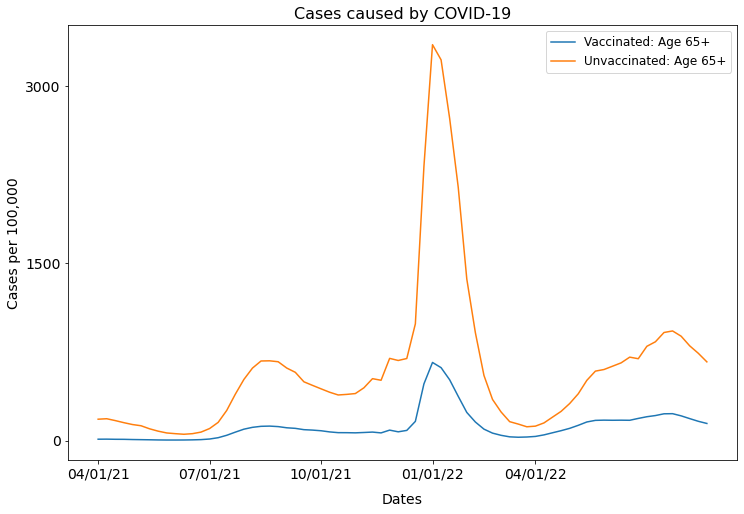

In [25]:
weeks = list(set(df_young['MMWR week']))

deaths_young = []
deaths_old = []
deaths_young2 = []
deaths_old2 = []
for week in weeks:
    deaths_vaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Unvaccinated population'])
    deaths_young.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    deaths_young2.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    deaths_vaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Unvaccinated population'])
    deaths_old.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    deaths_old2.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))  

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
#plt.plot(weeks, deaths_young, label = "Vaccinated: Ages 12-64")
plt.plot(weeks, deaths_old, label = "Vaccinated: Age 65+")
#plt.plot(weeks, deaths_young2, label = "Unvaccinated: Ages 12-64")
plt.plot(weeks, deaths_old2, label = "Unvaccinated: Age 65+")
plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
plt.yticks([0, 1500, 3000], fontsize=14)
plt.legend(fontsize=12)
plt.title("Cases caused by COVID-19", fontsize=16)
plt.ylabel("Cases per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

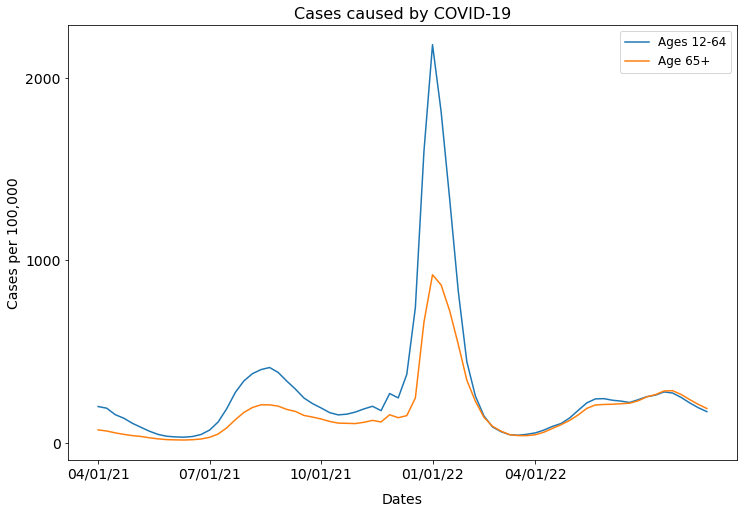

In [28]:
weeks = list(set(df_young['MMWR week']))

deaths_young = []
deaths_old = []
for week in weeks:
    deaths_vaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Unvaccinated population'])
    deaths_young.append((deaths_vaccinated + deaths_unvaccinated)*100000/(ppl_vaccinated + ppl_unvaccinated))
    deaths_vaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Unvaccinated population'])
    deaths_old.append((deaths_vaccinated + deaths_unvaccinated)*100000/(ppl_vaccinated + ppl_unvaccinated))    

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths_young, label = "Ages 12-64")
plt.plot(weeks, deaths_old, label = "Age 65+")
plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
plt.yticks([0, 1000, 2000], fontsize=14)
plt.legend(fontsize=12)
plt.title("Cases caused by COVID-19", fontsize=16)
plt.ylabel("Cases per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

In [30]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status_and_Booster_Dose.csv')
df = df.loc[(df['outcome'] == 'case') & (df['vaccine_product'] == 'all_types') & (df['month'] != 'SEP 2021')]
df = df.loc[df['age_group'].isin(['65+'])]
df

,outcome,month,mmwr_week,age_group,vaccine_product,boosted_with_outcome,boosted_population,primary_series_only_with_outcome,primary_series_only_population,unvaccinated_with_outcome,...,crude_primary_series_only_ir,crude_unvax_ir,crude_booster_irr,crude_irr,age_adj_booster_ir,age_adj_vax_ir,age_adj_unvax_ir,age_adj_booster_irr,age_adj_irr,continuity_correction
16,case,OCT 2021,202140,65+,all_types,385,1356305,26244,29607470,21158,...,88.639793,468.273797,16.496678,5.282885,NaN,NaN,NaN,NaN,NaN,1
23,case,OCT 2021,202141,65+,all_types,505,2552735,23134,28539144,19205,...,81.060595,438.551341,22.168423,5.410167,NaN,NaN,NaN,NaN,NaN,1
30,case,OCT 2021,202142,65+,all_types,694,3826752,21049,27383272,17746,...,76.868097,416.061434,22.941843,5.412667,NaN,NaN,NaN,NaN,NaN,1
37,case,OCT 2021,202143,65+,all_types,901,4866097,20826,26443065,17304,...,78.757890,423.413017,22.867578,5.376135,NaN,NaN,NaN,NaN,NaN,1
44,case,NOV 2021,202144,65+,all_types,1135,5860649,20280,25539774,17095,...,79.405558,434.987853,22.460891,5.478053,NaN,NaN,NaN,NaN,NaN,1
51,case,NOV 2021,202145,65+,all_types,1523,7953749,20957,23578670,18675,...,88.881179,490.932516,25.638569,5.523470,NaN,NaN,NaN,NaN,NaN,1
58,case,NOV 2021,202146,65+,all_types,2033,10081715,21691,21574655,21304,...,100.539267,578.051307,28.665758,5.749508,NaN,NaN,NaN,NaN,NaN,1
65,case,NOV 2021,202147,65+,all_types,2372,11822545,19258,19934568,20328,...,96.606056,563.109512,28.066558,5.828926,NaN,NaN,NaN,NaN,NaN,1
72,case,DEC 2021,202148,65+,all_types,4014,13430081,25188,18422279,27060,...,136.725755,767.528496,25.680045,5.613635,NaN,NaN,NaN,NaN,NaN,1
79,case,DEC 2021,202149,65+,all_types,4172,14645863,20596,17278563,25764,...,119.199727,747.533392,26.242262,6.271268,NaN,NaN,NaN,NaN,NaN,1


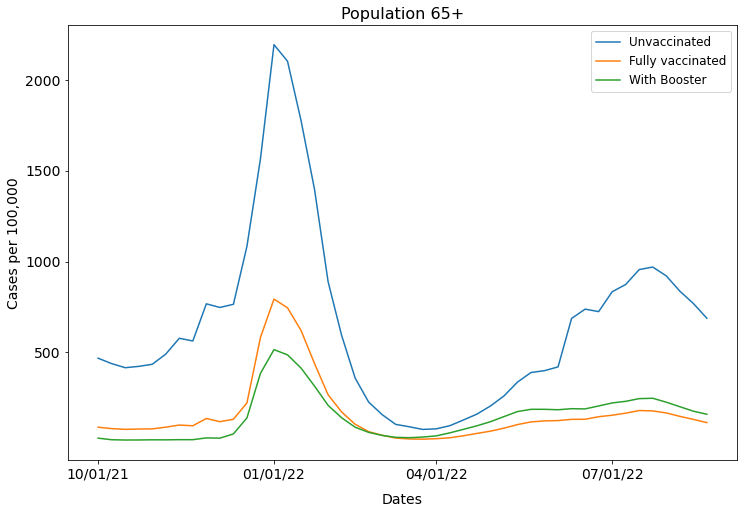

In [40]:
weeks = list(set(df['mmwr_week']))

deaths_vax = []
deaths_novax = []
deaths_boost = []
for week in weeks:
    deaths_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['primary_series_only_with_outcome'])
    deaths_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_with_outcome'])
    deaths_boosted = sum(df.loc[(df['mmwr_week'] == week)]['boosted_with_outcome'])
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['primary_series_only_population'])
    ppl_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_population'])
    ppl_boosted = sum(df.loc[(df['mmwr_week'] == week)]['boosted_population'])
    deaths_vax.append(deaths_vaccinated*100000/ppl_vaccinated)
    deaths_novax.append(deaths_unvaccinated*100000/ppl_unvaccinated)
    deaths_boost.append(deaths_boosted*100000/ppl_boosted)

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths_novax, label = "Unvaccinated")
plt.plot(weeks, deaths_vax, label = "Fully vaccinated")
plt.plot(weeks, deaths_boost, label = "With Booster")
plt.xticks(['202140', '202201', '202213', '202226'], ['10/01/21', '01/01/22', '04/01/22', '07/01/22'], fontsize=14)
plt.yticks([500, 1000, 1500, 2000], fontsize=14)
plt.legend(fontsize=12)
plt.title("Population 65+", fontsize=16)
plt.ylabel("Cases per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

In [41]:
"""
weeks = list(set(df['mmwr_week']))

deaths_vax = []
deaths_novax = []
deaths_boost = []
for week in weeks:
    deaths_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['primary_series_only_with_outcome'])
    deaths_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_with_outcome'])
    deaths_boosted = sum(df.loc[(df['mmwr_week'] == week)]['boosted_with_outcome'])
    deaths_all = deaths_vaccinated + deaths_unvaccinated + deaths_boosted
    deaths_vax.append(deaths_vaccinated/deaths_all)
    deaths_novax.append(deaths_unvaccinated/deaths_all)
    deaths_boost.append(deaths_boosted/deaths_all)

deaths_all = {
    'With Booster': deaths_boost,
    'Fully vaccinated': deaths_vax,
    'Unvaccinated': deaths_novax, 
}

fig, ax = plt.subplots()
ax.stackplot(weeks, deaths_all.values(),
             labels=deaths_all.keys(), alpha=0.8)
ax.legend(loc='upper left')
ax.set_title("Population 65+", fontsize=16)
ax.set_ylabel("Deaths per 100,000", fontsize=14)
ax.set_xlabel("Dates", fontsize=14, labelpad=12)

plt.show()
"""

'\nweeks = list(set(df[\'mmwr_week\']))\n\ndeaths_vax = []\ndeaths_novax = []\ndeaths_boost = []\nfor week in weeks:\n    deaths_vaccinated = sum(df.loc[(df[\'mmwr_week\'] == week)][\'primary_series_only_with_outcome\'])\n    deaths_unvaccinated = sum(df.loc[(df[\'mmwr_week\'] == week)][\'unvaccinated_with_outcome\'])\n    deaths_boosted = sum(df.loc[(df[\'mmwr_week\'] == week)][\'boosted_with_outcome\'])\n    deaths_all = deaths_vaccinated + deaths_unvaccinated + deaths_boosted\n    deaths_vax.append(deaths_vaccinated/deaths_all)\n    deaths_novax.append(deaths_unvaccinated/deaths_all)\n    deaths_boost.append(deaths_boosted/deaths_all)\n\ndeaths_all = {\n    \'With Booster\': deaths_boost,\n    \'Fully vaccinated\': deaths_vax,\n    \'Unvaccinated\': deaths_novax, \n}\n\nfig, ax = plt.subplots()\nax.stackplot(weeks, deaths_all.values(),\n             labels=deaths_all.keys(), alpha=0.8)\nax.legend(loc=\'upper left\')\nax.set_title("Population 65+", fontsize=16)\nax.set_ylabel("Deaths

In [46]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status.csv')
df = df.loc[(df['outcome'] == 'case') & (df['Vaccine product'] == 'all_types') & (df['Age group'] != 'all_ages_adj')]
df

,outcome,month,MMWR week,Age group,Vaccine product,Vaccinated with outcome,Fully vaccinated population,Unvaccinated with outcome,Unvaccinated population,Crude vax IR,Crude unvax IR,Crude IRR,Age adjusted vax IR,Age adjusted unvax IR,Age adjusted IRR,Continuity correction
0,case,APR 2021,202114,12-17,all_types,9,37820.00,31430,17985455.0,23.796933,174.752321,7.343481,NaN,NaN,NaN,0
1,case,APR 2021,202114,18-29,all_types,676,2612741.00,77855,31792647.0,25.873211,244.883668,9.464757,NaN,NaN,NaN,0
2,case,APR 2021,202114,30-49,all_types,1858,7601712.00,100009,41979718.0,24.441863,238.231710,9.746872,NaN,NaN,NaN,0
3,case,APR 2021,202114,50-64,all_types,1560,7641882.00,51213,23586172.0,20.413820,217.131462,10.636494,NaN,NaN,NaN,0
4,case,APR 2021,202114,65-79,all_types,1685,14812372.00,15104,7825121.0,11.375626,193.019380,16.967803,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,case,AUG 2022,202233,18-29,all_types,27982,23816339.00,30736,11991451.0,117.490770,256.315937,2.181584,NaN,NaN,NaN,1
752,case,AUG 2022,202233,30-49,all_types,57375,43419437.00,45989,13007687.2,132.141280,353.552475,2.675564,NaN,NaN,NaN,1
753,case,AUG 2022,202233,50-64,all_types,48078,35943866.00,25017,6517666.7,133.758567,383.833681,2.869601,NaN,NaN,NaN,1
754,case,AUG 2022,202233,65-79,all_types,36190,26662308.55,14517,2034203.3,135.734683,713.645485,5.257650,NaN,NaN,NaN,1


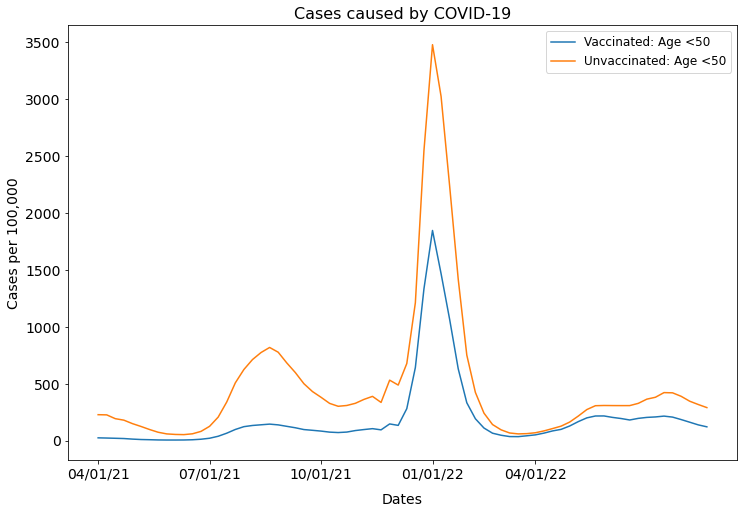

In [47]:
df1 = df.loc[df['Age group'].isin(['12-17', '18-29', '30-49'])]
weeks = list(set(df_young['MMWR week']))

deaths1 = []
deaths1_u = []
for week in weeks:
    deaths_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated population'])
    if (ppl_vaccinated > 0):
        deaths1.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    else:
        deaths1.append(0)
    if (ppl_unvaccinated > 0):
        deaths1_u.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    else:
        deaths1_u.append(0)

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths1, label = "Vaccinated: Age <50")
plt.plot(weeks, deaths1_u, label = "Unvaccinated: Age <50")
plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
#plt.yticks([0, 5, 10, 15, 20, 25], fontsize=14)
plt.legend(fontsize=12)
plt.title("Cases caused by COVID-19", fontsize=16)
plt.ylabel("Cases per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

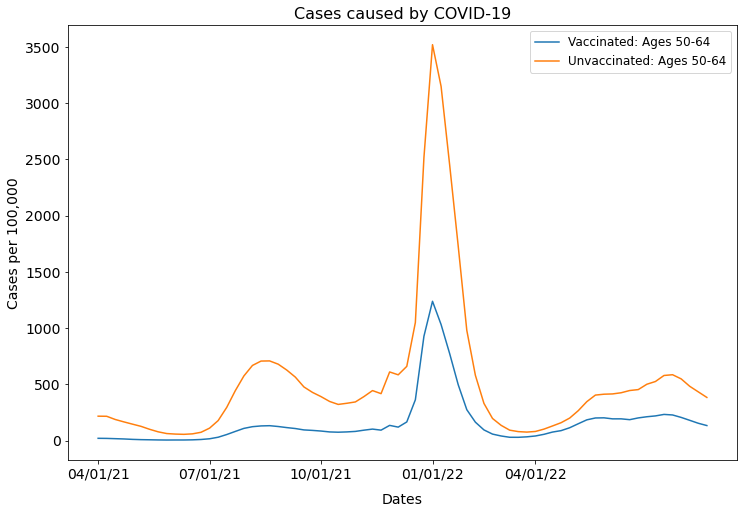

In [48]:
df1 = df.loc[df['Age group'].isin(['50-64'])]
weeks = list(set(df_young['MMWR week']))

deaths1 = []
deaths1_u = []
for week in weeks:
    deaths_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated population'])
    if (ppl_vaccinated > 0):
        deaths1.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    else:
        deaths1.append(0)
    if (ppl_unvaccinated > 0):
        deaths1_u.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    else:
        deaths1_u.append(0)

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths1, label = "Vaccinated: Ages 50-64")
plt.plot(weeks, deaths1_u, label = "Unvaccinated: Ages 50-64")
plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
#plt.yticks([0, 5, 10, 15, 20, 25], fontsize=14)
plt.legend(fontsize=12)
plt.title("Cases caused by COVID-19", fontsize=16)
plt.ylabel("Cases per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

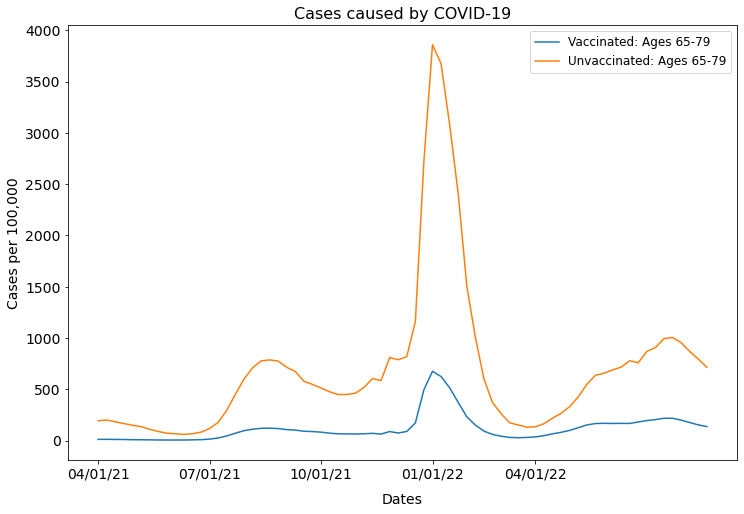

In [49]:
df1 = df.loc[df['Age group'].isin(['65-79'])]
weeks = list(set(df_young['MMWR week']))

deaths1 = []
deaths1_u = []
for week in weeks:
    deaths_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated population'])
    if (ppl_vaccinated > 0):
        deaths1.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    else:
        deaths1.append(0)
    if (ppl_unvaccinated > 0):
        deaths1_u.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    else:
        deaths1_u.append(0)

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths1, label = "Vaccinated: Ages 65-79")
plt.plot(weeks, deaths1_u, label = "Unvaccinated: Ages 65-79")
plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
#plt.yticks([0, 5, 10, 15, 20, 25], fontsize=14)
plt.legend(fontsize=12)
plt.title("Cases caused by COVID-19", fontsize=16)
plt.ylabel("Cases per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

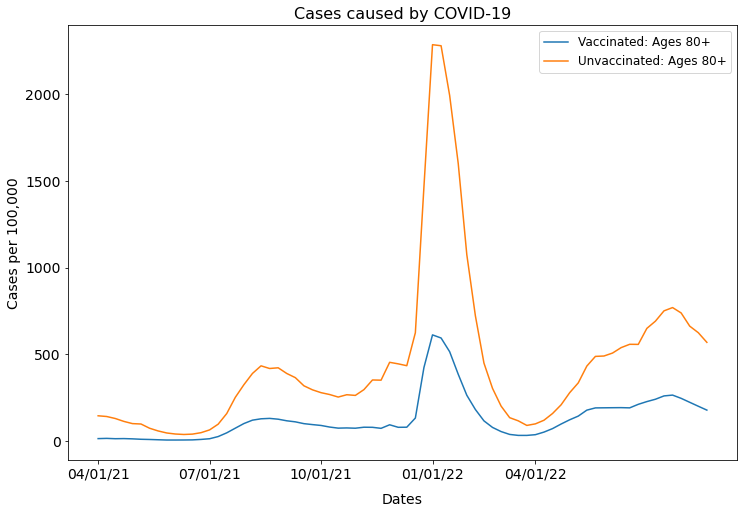

In [50]:
df1 = df.loc[df['Age group'].isin(['80+'])]
weeks = list(set(df_young['MMWR week']))

deaths1 = []
deaths1_u = []
for week in weeks:
    deaths_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated population'])
    if (ppl_vaccinated > 0):
        deaths1.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    else:
        deaths1.append(0)
    if (ppl_unvaccinated > 0):
        deaths1_u.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    else:
        deaths1_u.append(0)

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths1, label = "Vaccinated: Ages 80+")
plt.plot(weeks, deaths1_u, label = "Unvaccinated: Ages 80+")
plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
#plt.yticks([0, 5, 10, 15, 20, 25], fontsize=14)
plt.legend(fontsize=12)
plt.title("Cases caused by COVID-19", fontsize=16)
plt.ylabel("Cases per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

In [53]:
df1 = df.loc[df['Age group'].isin(['12-17', '18-29', '30-49'])]
df2 = df.loc[df['Age group'].isin(['50-64'])]
df3 = df.loc[df['Age group'].isin(['65-79'])]
df4 = df.loc[df['Age group'].isin(['80+'])]

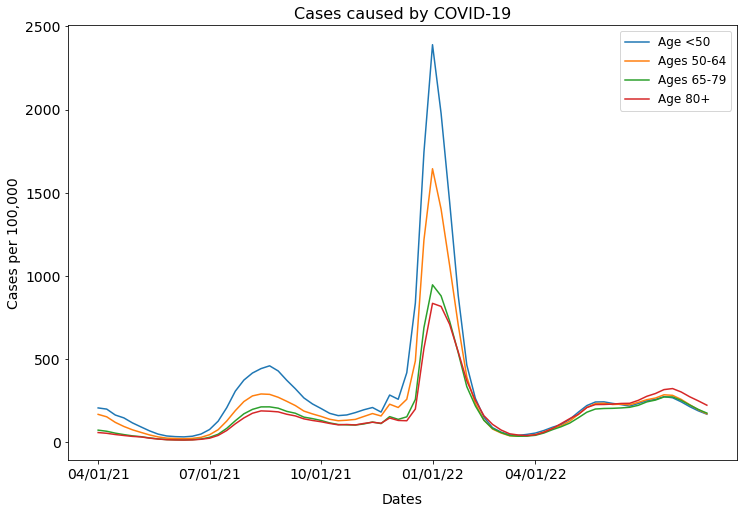

In [54]:
weeks = list(set(df_young['MMWR week']))

deaths1 = []
deaths2 = []
deaths3 = []
deaths4 = []
for week in weeks:
    deaths_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated population'])
    deaths1.append((deaths_vaccinated + deaths_unvaccinated)*100000/(ppl_vaccinated + ppl_unvaccinated))
    deaths_vaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Unvaccinated population'])
    deaths2.append((deaths_vaccinated + deaths_unvaccinated)*100000/(ppl_vaccinated + ppl_unvaccinated))
    deaths_vaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Unvaccinated population'])
    deaths3.append((deaths_vaccinated + deaths_unvaccinated)*100000/(ppl_vaccinated + ppl_unvaccinated))
    deaths_vaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Unvaccinated population'])
    deaths4.append((deaths_vaccinated + deaths_unvaccinated)*100000/(ppl_vaccinated + ppl_unvaccinated))  

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths1, label = "Age <50")
plt.plot(weeks, deaths2, label = "Ages 50-64")
plt.plot(weeks, deaths3, label = "Ages 65-79")
plt.plot(weeks, deaths4, label = "Age 80+")
plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
#plt.yticks([0, 5, 10, 15, 20, 25], fontsize=14)
plt.legend(fontsize=12)
plt.title("Cases caused by COVID-19", fontsize=16)
plt.ylabel("Cases per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

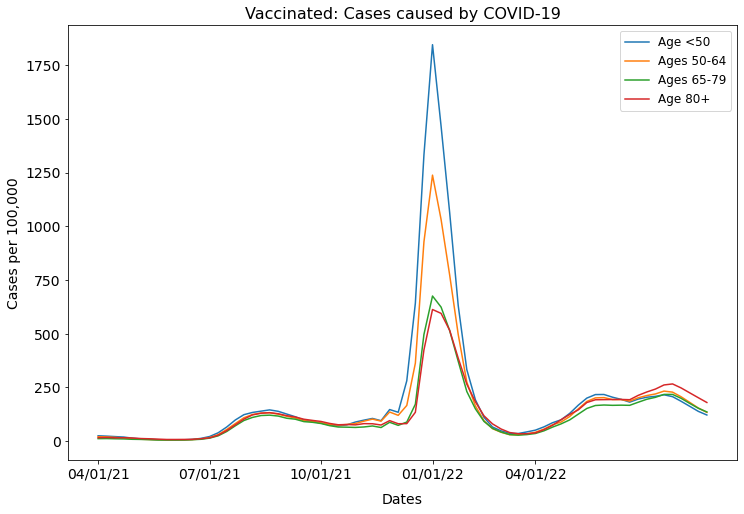

In [55]:
weeks = list(set(df_young['MMWR week']))

deaths1 = []
deaths2 = []
deaths3 = []
deaths4 = []
for week in weeks:
    deaths_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated population'])
    if (ppl_vaccinated > 0):
        deaths1.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    else:
        deaths1.append(0)
    deaths_vaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Unvaccinated population'])
    if (ppl_vaccinated > 0):
        deaths2.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    else:
        deaths2.append(0)
    deaths_vaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Unvaccinated population'])
    if (ppl_vaccinated > 0):
        deaths3.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    else:
        deaths3.append(0)
    deaths_vaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Unvaccinated population'])
    if (ppl_vaccinated > 0):
        deaths4.append((deaths_vaccinated)*100000/(ppl_vaccinated))
    else:
        deaths4.append(0)

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths1, label = "Age <50")
plt.plot(weeks, deaths2, label = "Ages 50-64")
plt.plot(weeks, deaths3, label = "Ages 65-79")
plt.plot(weeks, deaths4, label = "Age 80+")
plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
#plt.yticks([0, 5, 10, 15, 20, 25], fontsize=14)
plt.legend(fontsize=12)
plt.title("Vaccinated: Cases caused by COVID-19", fontsize=16)
plt.ylabel("Cases per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

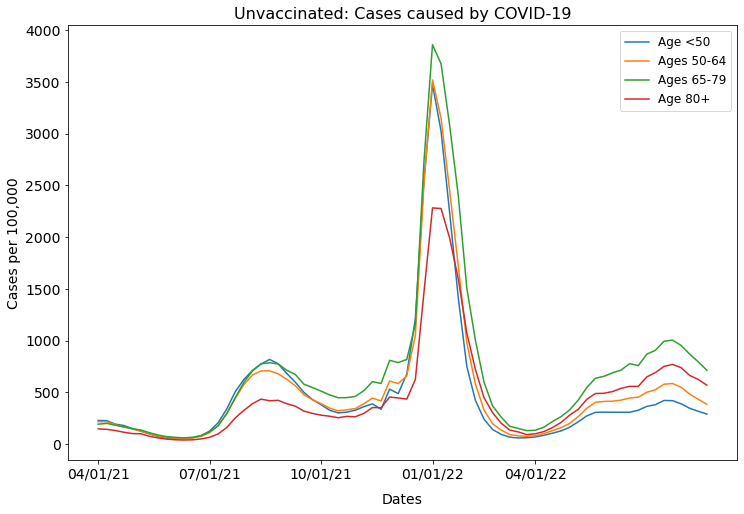

In [56]:
weeks = list(set(df_young['MMWR week']))

deaths1 = []
deaths2 = []
deaths3 = []
deaths4 = []
for week in weeks:
    deaths_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated population'])
    deaths1.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    deaths_vaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Unvaccinated population'])
    deaths2.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    deaths_vaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Unvaccinated population'])
    deaths3.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    deaths_vaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Unvaccinated population'])
    deaths4.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))  

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths1, label = "Age <50")
plt.plot(weeks, deaths2, label = "Ages 50-64")
plt.plot(weeks, deaths3, label = "Ages 65-79")
plt.plot(weeks, deaths4, label = "Age 80+")
plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
#plt.yticks([0, 5, 10, 15, 20, 25], fontsize=14)
plt.legend(fontsize=12)
plt.title("Unvaccinated: Cases caused by COVID-19", fontsize=16)
plt.ylabel("Cases per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

In [57]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status_and_Booster_Dose.csv')
df = df.loc[(df['outcome'] == 'case') & (df['vaccine_product'] == 'all_types') & (df['month'] != 'SEP 2021')]
df = df.loc[df['age_group'].isin(['65+'])]
df

,outcome,month,mmwr_week,age_group,vaccine_product,boosted_with_outcome,boosted_population,primary_series_only_with_outcome,primary_series_only_population,unvaccinated_with_outcome,...,crude_primary_series_only_ir,crude_unvax_ir,crude_booster_irr,crude_irr,age_adj_booster_ir,age_adj_vax_ir,age_adj_unvax_ir,age_adj_booster_irr,age_adj_irr,continuity_correction
16,case,OCT 2021,202140,65+,all_types,385,1356305,26244,29607470,21158,...,88.639793,468.273797,16.496678,5.282885,NaN,NaN,NaN,NaN,NaN,1
23,case,OCT 2021,202141,65+,all_types,505,2552735,23134,28539144,19205,...,81.060595,438.551341,22.168423,5.410167,NaN,NaN,NaN,NaN,NaN,1
30,case,OCT 2021,202142,65+,all_types,694,3826752,21049,27383272,17746,...,76.868097,416.061434,22.941843,5.412667,NaN,NaN,NaN,NaN,NaN,1
37,case,OCT 2021,202143,65+,all_types,901,4866097,20826,26443065,17304,...,78.757890,423.413017,22.867578,5.376135,NaN,NaN,NaN,NaN,NaN,1
44,case,NOV 2021,202144,65+,all_types,1135,5860649,20280,25539774,17095,...,79.405558,434.987853,22.460891,5.478053,NaN,NaN,NaN,NaN,NaN,1
51,case,NOV 2021,202145,65+,all_types,1523,7953749,20957,23578670,18675,...,88.881179,490.932516,25.638569,5.523470,NaN,NaN,NaN,NaN,NaN,1
58,case,NOV 2021,202146,65+,all_types,2033,10081715,21691,21574655,21304,...,100.539267,578.051307,28.665758,5.749508,NaN,NaN,NaN,NaN,NaN,1
65,case,NOV 2021,202147,65+,all_types,2372,11822545,19258,19934568,20328,...,96.606056,563.109512,28.066558,5.828926,NaN,NaN,NaN,NaN,NaN,1
72,case,DEC 2021,202148,65+,all_types,4014,13430081,25188,18422279,27060,...,136.725755,767.528496,25.680045,5.613635,NaN,NaN,NaN,NaN,NaN,1
79,case,DEC 2021,202149,65+,all_types,4172,14645863,20596,17278563,25764,...,119.199727,747.533392,26.242262,6.271268,NaN,NaN,NaN,NaN,NaN,1


In [22]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status_and_Booster_Dose.csv')
df = df.loc[(df['outcome'] == 'death') & (df['vaccine_product'] == 'all_types') & (df['month'] != 'SEP 2021')]
df = df.loc[df['age_group'].isin(['18-49'])]
df

,outcome,month,mmwr_week,age_group,vaccine_product,boosted_with_outcome,boosted_population,primary_series_only_with_outcome,primary_series_only_population,unvaccinated_with_outcome,...,crude_primary_series_only_ir,crude_unvax_ir,crude_booster_irr,crude_irr,age_adj_booster_ir,age_adj_vax_ir,age_adj_unvax_ir,age_adj_booster_irr,age_adj_irr,continuity_correction
248,death,OCT 2021,202140,18-49,all_types,1,466269,19,50152135,435,...,0.037885,1.378607,6.428018,36.389523,NaN,NaN,NaN,NaN,NaN,0
255,death,OCT 2021,202141,18-49,all_types,0,720461,20,50592139,368,...,0.039532,1.184187,NaN,29.955277,NaN,NaN,NaN,NaN,NaN,0
262,death,OCT 2021,202142,18-49,all_types,1,1070621,20,50859698,336,...,0.039324,1.096538,11.739765,27.884794,NaN,NaN,NaN,NaN,NaN,0
269,death,OCT 2021,202143,18-49,all_types,0,1438403,21,51024755,295,...,0.041156,0.977093,NaN,23.740923,NaN,NaN,NaN,NaN,NaN,0
276,death,NOV 2021,202144,18-49,all_types,2,1839911,19,51094531,301,...,0.037186,1.011929,9.309298,27.212657,NaN,NaN,NaN,NaN,NaN,0
283,death,NOV 2021,202145,18-49,all_types,2,2519006,21,50840518,307,...,0.041306,1.046841,13.184994,25.343780,NaN,NaN,NaN,NaN,NaN,0
290,death,NOV 2021,202146,18-49,all_types,2,3388897,31,50371951,349,...,0.061542,1.208731,20.481322,19.640687,NaN,NaN,NaN,NaN,NaN,0
297,death,NOV 2021,202147,18-49,all_types,4,4365522,23,49750671,344,...,0.046231,1.209891,13.204511,26.170815,NaN,NaN,NaN,NaN,NaN,0
304,death,DEC 2021,202148,18-49,all_types,1,5570656,30,48885768,382,...,0.061368,1.365429,76.063364,22.250019,NaN,NaN,NaN,NaN,NaN,0
311,death,DEC 2021,202149,18-49,all_types,3,6980186,21,47776809,386,...,0.043954,1.405990,32.713570,31.987481,NaN,NaN,NaN,NaN,NaN,0


In [100]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status_and_Booster_Dose.csv')
df = df.loc[(df['outcome'] == 'death') & (df['vaccine_product'] == 'all_types') & (df['month'] != 'SEP 2021')]
df = df.loc[df['age_group'].isin(['50-64'])]
df

,outcome,month,mmwr_week,age_group,vaccine_product,boosted_with_outcome,boosted_population,primary_series_only_with_outcome,primary_series_only_population,unvaccinated_with_outcome,...,crude_primary_series_only_ir,crude_unvax_ir,crude_booster_irr,crude_irr,age_adj_booster_ir,age_adj_vax_ir,age_adj_unvax_ir,age_adj_booster_irr,age_adj_irr,continuity_correction
396,death,OCT 2021,202140,50-64,all_types,4,519538,125,29349192,1016,...,0.425906,11.075216,14.384989,26.003891,NaN,NaN,NaN,NaN,NaN,0
403,death,OCT 2021,202141,50-64,all_types,8,757735,120,29335527,906,...,0.409060,10.041330,9.510834,24.547309,NaN,NaN,NaN,NaN,NaN,0
410,death,OCT 2021,202142,50-64,all_types,7,1105111,103,29189395,802,...,0.352868,9.033333,14.261194,25.599760,NaN,NaN,NaN,NaN,NaN,0
417,death,OCT 2021,202143,50-64,all_types,5,1467278,87,28998373,728,...,0.300017,8.372086,24.568355,27.905387,NaN,NaN,NaN,NaN,NaN,0
424,death,NOV 2021,202144,50-64,all_types,5,1872338,105,28743633,834,...,0.365298,9.803294,36.710158,26.836407,NaN,NaN,NaN,NaN,NaN,0
431,death,NOV 2021,202145,50-64,all_types,5,2671046,127,28090948,819,...,0.452103,9.829745,52.511402,21.742272,NaN,NaN,NaN,NaN,NaN,0
438,death,NOV 2021,202146,50-64,all_types,14,3640937,140,27262536,934,...,0.513525,11.480737,29.857601,22.356715,NaN,NaN,NaN,NaN,NaN,0
445,death,NOV 2021,202147,50-64,all_types,18,4616854,157,26411674,932,...,0.594434,11.749273,30.135931,19.765475,NaN,NaN,NaN,NaN,NaN,0
452,death,DEC 2021,202148,50-64,all_types,12,5767305,168,25386411,1148,...,0.661771,14.844801,71.345411,22.431917,NaN,NaN,NaN,NaN,NaN,1
459,death,DEC 2021,202149,50-64,all_types,20,7009255,163,24257146,1143,...,0.671967,15.217676,53.332286,22.646466,NaN,NaN,NaN,NaN,NaN,1


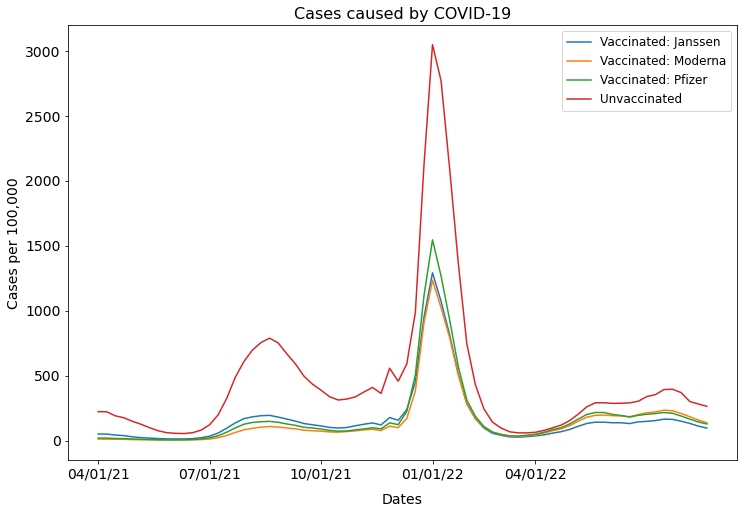

In [59]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status.csv')
#df = df.loc[(df['Vaccine product'] == 'all_types') & (df['MMWR week'] == 202213)]
df = df.loc[(df['outcome'] == 'case') & (df['Age group'] == 'all_ages_adj')]
df
# & (df['Age group'] != 'all_ages_adj')
#(df['outcome'] == 'death') & 

df1 = df.loc[df['Vaccine product'] == 'Janssen']
df2 = df.loc[df['Vaccine product'] == 'Moderna']
df3 = df.loc[df['Vaccine product'] == 'Pfizer']

weeks = list(set(df_young['MMWR week']))

deaths_jj = []
deaths_mod = []
deaths_pf = []
deaths_unvax = []
for week in weeks:
    
    deaths = sum(df1.loc[(df1['MMWR week'] == week)]['Vaccinated with outcome'])
    ppl_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Fully vaccinated population'])
    deaths_jj.append((deaths)*100000/(ppl_vaccinated))
    
    deaths = sum(df2.loc[(df2['MMWR week'] == week)]['Vaccinated with outcome'])
    ppl_vaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Fully vaccinated population'])
    deaths_mod.append((deaths)*100000/(ppl_vaccinated))
    
    deaths = sum(df3.loc[(df3['MMWR week'] == week)]['Vaccinated with outcome'])
    ppl_vaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Fully vaccinated population'])
    deaths_pf.append((deaths)*100000/(ppl_vaccinated))
    
    ppl_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated population'])
    deaths_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated with outcome'])
    deaths_unvax.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    
weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new

plt.yticks(fontsize=14)
plt.plot(weeks, deaths_jj, label = "Vaccinated: Janssen")
plt.plot(weeks, deaths_mod, label = "Vaccinated: Moderna")
plt.plot(weeks, deaths_pf, label = "Vaccinated: Pfizer")
plt.plot(weeks, deaths_unvax, label = "Unvaccinated")

plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
plt.legend(fontsize=12)
plt.title("Cases caused by COVID-19", fontsize=16)
plt.ylabel("Cases per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

In [68]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status_and_Booster_Dose.csv')
df = df.loc[(df['outcome'] == 'case') & (df['month'] != 'SEP 2021')]
df

,outcome,month,mmwr_week,age_group,vaccine_product,boosted_with_outcome,boosted_population,primary_series_only_with_outcome,primary_series_only_population,unvaccinated_with_outcome,...,crude_primary_series_only_ir,crude_unvax_ir,crude_booster_irr,crude_irr,age_adj_booster_ir,age_adj_vax_ir,age_adj_unvax_ir,age_adj_booster_irr,age_adj_irr,continuity_correction
14,case,OCT 2021,202140,18-49,all_types,204,446517,50268,55208159,135697,...,91.051759,395.202134,8.650219,4.340412,NaN,NaN,NaN,NaN,NaN,0
15,case,OCT 2021,202140,50-64,all_types,185,542808,27147,31149813,39122,...,87.149801,407.093555,11.944521,4.671193,NaN,NaN,NaN,NaN,NaN,0
16,case,OCT 2021,202140,65+,all_types,385,1356305,26244,29607470,21158,...,88.639793,468.273797,16.496678,5.282885,NaN,NaN,NaN,NaN,NaN,1
17,case,OCT 2021,202140,all_ages,Janssen,13,37160,10538,9935264,195977,...,106.066633,404.372499,11.558832,3.812438,31.190843,105.895028,410.046409,13.146371,3.872197,0
18,case,OCT 2021,202140,all_ages,Moderna,251,957537,34387,45803892,195977,...,75.074406,404.372499,15.426360,5.386290,37.385958,76.380169,410.046409,10.967926,5.368493,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,case,AUG 2022,202233,65+,all_types,38925,24341582,11383,9987171,19875,...,113.976220,688.166953,4.303423,6.037812,NaN,NaN,NaN,NaN,NaN,1
377,case,AUG 2022,202233,all_ages,Janssen,5507,4446112,5296,7163819,156933,...,73.927049,290.043840,2.341688,3.923379,111.704005,62.677977,346.687613,3.103627,5.531251,1
378,case,AUG 2022,202233,all_ages,Moderna,48479,29904283,24885,23204173,156933,...,107.243641,290.043840,1.789136,2.704532,136.834072,116.227442,346.687613,2.533635,2.982838,1
379,case,AUG 2022,202233,all_ages,Pfizer,66058,41812399,47786,46749110,156933,...,102.217989,290.043840,1.835876,2.837503,149.035762,103.891673,346.687613,2.326204,3.337011,1


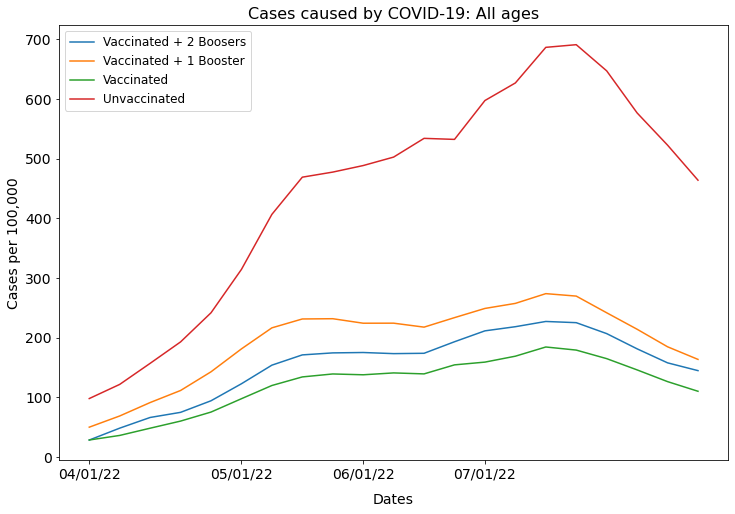

In [69]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status_and_Second_Booster_Dose.csv')
df = df.loc[(df['outcome'] == 'case') & (df['month'] != 'SEP 2021') & (df['vaccine_product'] == 'all_types') & (df['age_group'] == 'all_ages')]
df.columns
weeks = list(set(df['mmwr_week']))

deaths_vax = []
deaths_boost = []
deaths_boost2 = []
deaths_unvax = []
for week in weeks:
    
    deaths = sum(df.loc[(df['mmwr_week'] == week)]['two_boosted_with_outcome'])
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['two_booster_population'])
    deaths_boost2.append((deaths)*100000/(ppl_vaccinated))
    
    deaths = sum(df.loc[(df['mmwr_week'] == week)]['one_boosted_with_outcome'])
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['one_booster_population'])
    deaths_boost.append((deaths)*100000/(ppl_vaccinated))
    
    deaths = sum(df.loc[(df['mmwr_week'] == week)]['vaccinated_with_outcome'])
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['fully_vaccinated_population'])
    deaths_vax.append((deaths)*100000/(ppl_vaccinated))
    
    ppl_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_population'])
    deaths_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_with_outcome'])
    deaths_unvax.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    
weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new

plt.yticks(fontsize=14)
plt.plot(weeks, deaths_boost2, label = "Vaccinated + 2 Boosers")
plt.plot(weeks, deaths_boost, label = "Vaccinated + 1 Booster")
plt.plot(weeks, deaths_vax, label = "Vaccinated")
plt.plot(weeks, deaths_unvax, label = "Unvaccinated")

plt.xticks(['202213', '202218', '202222', '202226'], ['04/01/22', '05/01/22', '06/01/22', '07/01/22'], fontsize=14)
plt.legend(fontsize=12)
plt.title("Cases caused by COVID-19: All ages", fontsize=16)
plt.ylabel("Cases per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

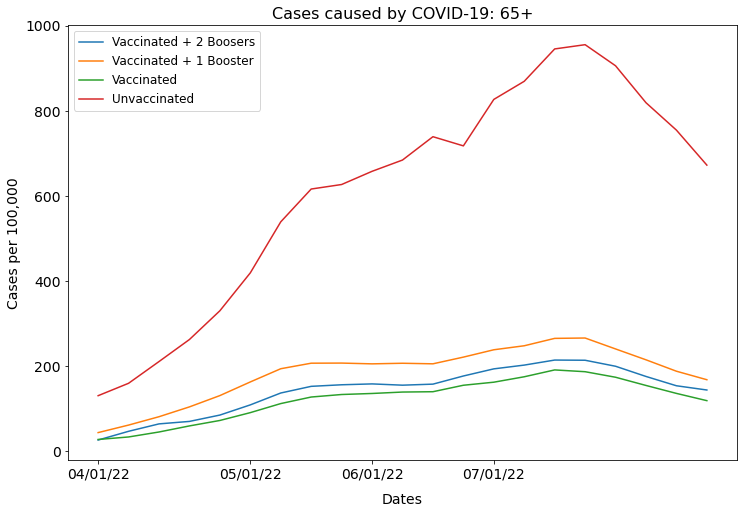

In [64]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status_and_Second_Booster_Dose.csv')
df = df.loc[(df['outcome'] == 'case') & (df['month'] != 'SEP 2021') & (df['vaccine_product'] == 'all_types') & (df['age_group'] == '65+')]
df.columns
weeks = list(set(df['mmwr_week']))

deaths_vax = []
deaths_boost = []
deaths_boost2 = []
deaths_unvax = []
for week in weeks:
    
    deaths = sum(df.loc[(df['mmwr_week'] == week)]['two_boosted_with_outcome'])
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['two_booster_population'])
    deaths_boost2.append((deaths)*100000/(ppl_vaccinated))
    
    deaths = sum(df.loc[(df['mmwr_week'] == week)]['one_boosted_with_outcome'])
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['one_booster_population'])
    deaths_boost.append((deaths)*100000/(ppl_vaccinated))
    
    deaths = sum(df.loc[(df['mmwr_week'] == week)]['vaccinated_with_outcome'])
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['fully_vaccinated_population'])
    deaths_vax.append((deaths)*100000/(ppl_vaccinated))
    
    ppl_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_population'])
    deaths_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_with_outcome'])
    deaths_unvax.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    
weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new

plt.yticks(fontsize=14)
plt.plot(weeks, deaths_boost2, label = "Vaccinated + 2 Boosers")
plt.plot(weeks, deaths_boost, label = "Vaccinated + 1 Booster")
plt.plot(weeks, deaths_vax, label = "Vaccinated")
plt.plot(weeks, deaths_unvax, label = "Unvaccinated")

plt.xticks(['202213', '202218', '202222', '202226'], ['04/01/22', '05/01/22', '06/01/22', '07/01/22'], fontsize=14)
plt.legend(fontsize=12)
plt.title("Cases caused by COVID-19: 65+", fontsize=16)
plt.ylabel("Cases per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

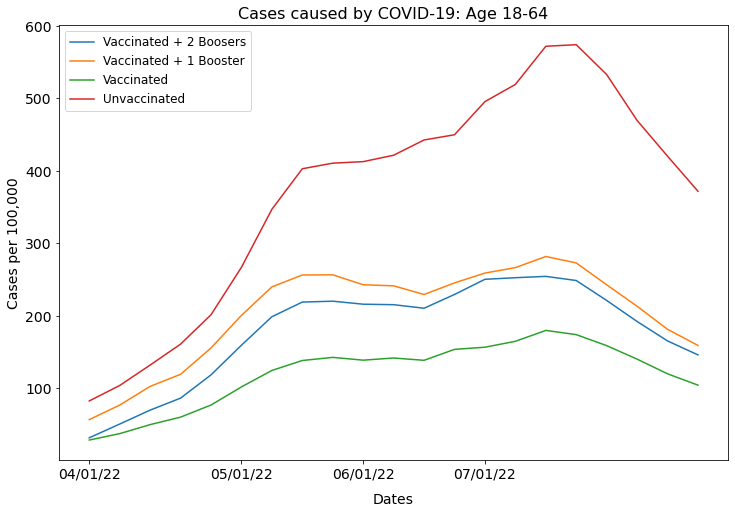

In [71]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status_and_Second_Booster_Dose.csv')
df = df.loc[(df['outcome'] == 'case') & (df['month'] != 'SEP 2021') & (df['vaccine_product'] == 'all_types') & (df['age_group'] != 'all_ages') & (df['age_group'] != '65+')]
df.columns
weeks = list(set(df['mmwr_week']))

deaths_vax = []
deaths_boost = []
deaths_boost2 = []
deaths_unvax = []
for week in weeks:
    
    deaths = sum(df.loc[(df['mmwr_week'] == week)]['two_boosted_with_outcome'])
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['two_booster_population'])
    deaths_boost2.append((deaths)*100000/(ppl_vaccinated))
    
    deaths = sum(df.loc[(df['mmwr_week'] == week)]['one_boosted_with_outcome'])
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['one_booster_population'])
    deaths_boost.append((deaths)*100000/(ppl_vaccinated))
    
    deaths = sum(df.loc[(df['mmwr_week'] == week)]['vaccinated_with_outcome'])
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['fully_vaccinated_population'])
    deaths_vax.append((deaths)*100000/(ppl_vaccinated))
    
    ppl_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_population'])
    deaths_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_with_outcome'])
    deaths_unvax.append((deaths_unvaccinated)*100000/(ppl_unvaccinated))
    
weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new

plt.yticks(fontsize=14)
plt.plot(weeks, deaths_boost2, label = "Vaccinated + 2 Boosers")
plt.plot(weeks, deaths_boost, label = "Vaccinated + 1 Booster")
plt.plot(weeks, deaths_vax, label = "Vaccinated")
plt.plot(weeks, deaths_unvax, label = "Unvaccinated")

plt.xticks(['202213', '202218', '202222', '202226'], ['04/01/22', '05/01/22', '06/01/22', '07/01/22'], fontsize=14)
plt.legend(fontsize=12)
plt.title("Cases caused by COVID-19: Age 18-64", fontsize=16)
plt.ylabel("Cases per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)